# Homework 10

### Decision Tree

In [128]:
# import module
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz

In [129]:
# loading and reading breast_cancer 
cancer = load_breast_cancer()
X, y, features, labels = cancer.data, cancer.target, \
cancer.feature_names, cancer.target_names

print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 3)
print ('X_train.shape= ',X_train.shape)
print ('X_test.shape= ',X_test.shape)
print ('y_train.shape= ',y_train.shape)
print ('y_test.shape= ',y_test.shape)
print ('features:', features)
dict_names = {i:v for i,v in enumerate(labels)}
print ('target names :', dict_names)

X.shape=  (569, 30)
y.shape=  (569,)
X_train.shape=  (426, 30)
X_test.shape=  (143, 30)
y_train.shape=  (426,)
y_test.shape=  (143,)
features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
target names : {0: 'malignant', 1: 'benign'}


In [130]:
# Decision tree Classifier
max_depth = 4
clf = DecisionTreeClassifier(
    criterion=  'entropy',
    random_state=20,        
    max_depth=max_depth,    
    max_leaf_nodes=4,
).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

train accuracy= 95.305%
test accuracy= 92.308%


In [131]:
graph_viz = tree.export_graphviz(clf, out_file=None,feature_names=features, class_names=labels, filled = True)
graph = graphviz.Source(graph_viz)
graph.view(cleanup =True)

'Source.gv.pdf'

In [132]:
def plot_feature_importances(clf, features):
    plt.figure(figsize=(6, 6), dpi=80)
    c_features = len(features)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), features)

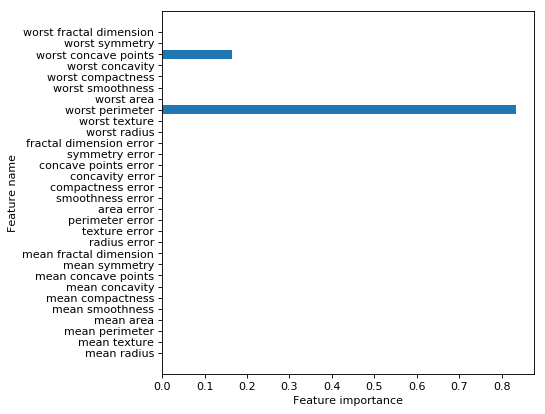

In [133]:
    plot_feature_importances(clf, features)

### Random Forests

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
cancer = load_breast_cancer()
X, y, features, labels = cancer.data, cancer.target, \
cancer.feature_names, cancer.target_names

In [136]:
clf = RandomForestClassifier().fit (X_train, y_train)
clf.score (X_train, y_train)
n_estimators_list= [5,10,20]
max_features_list= list(np.arange(1, X_train.shape[1]+1))

for i in range (len(n_estimators_list)): 
    for j in range (len(max_features_list)):
        index = len(max_features_list)*i+j           
        clf = RandomForestClassifier(
            n_estimators= n_estimators_list[i],
            max_features=max_features_list[j],        
        ).fit(X_train, y_train)
        accuracy_train = clf.score (X_train, y_train)
        accuracy_test = clf.score (X_test, y_test)
        print ('n_estimators= {}, max_features = {}, accuracy_train = {:.3%}, accuracy_test = {:.3%}'.format (
            n_estimators_list[i],max_features_list[j], accuracy_train, accuracy_test))
        
print ('Comparing  to desicion tree clf')
max_depth = 4
clf = DecisionTreeClassifier(
    criterion=  'entropy',
    random_state=20,        
    max_depth=max_depth,
).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

n_estimators= 5, max_features = 1, accuracy_train = 99.531%, accuracy_test = 94.406%
n_estimators= 5, max_features = 2, accuracy_train = 99.531%, accuracy_test = 93.706%
n_estimators= 5, max_features = 3, accuracy_train = 99.531%, accuracy_test = 94.406%
n_estimators= 5, max_features = 4, accuracy_train = 99.531%, accuracy_test = 94.406%
n_estimators= 5, max_features = 5, accuracy_train = 99.061%, accuracy_test = 93.007%
n_estimators= 5, max_features = 6, accuracy_train = 99.531%, accuracy_test = 93.706%
n_estimators= 5, max_features = 7, accuracy_train = 99.061%, accuracy_test = 95.105%
n_estimators= 5, max_features = 8, accuracy_train = 99.765%, accuracy_test = 94.406%
n_estimators= 5, max_features = 9, accuracy_train = 99.531%, accuracy_test = 93.706%
n_estimators= 5, max_features = 10, accuracy_train = 99.531%, accuracy_test = 95.105%
n_estimators= 5, max_features = 11, accuracy_train = 99.531%, accuracy_test = 92.308%
n_estimators= 5, max_features = 12, accuracy_train = 99.765%, a

### Gradient boosting decision tree

In [137]:
from sklearn.ensemble import GradientBoostingClassifier

In [138]:
cancer = load_breast_cancer()
X, y, features, labels = cancer.data, cancer.target, \
cancer.feature_names, cancer.target_names

In [139]:
clf = GradientBoostingClassifier(learning_rate=0.01,max_depth=3).fit(X_train, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test, y_test)))

train accuracy= 98.592%
test accuracy= 94.406%
